**Problem Statement:** **House Price Prediction**

**Description:**- House price prediction is a common problem in the real estate industry and involves predicting the selling price of a house based on various features and attributes. The problem is typically approached as a regression problem, where the target variable is the price of the house, and the features are various attributes of the house The features used in house price prediction can include both quantitative and categorical variables, such as the number of bedrooms, house area, bedrooms, furnished, nearness to main road, and various amenities such as a garage and other factors that may influence the value of the property. Accurate predictions can help agents and appraisers price homes correctly, while homeowners can use the predictions to set a reasonable asking price for their properties. Accurate house price prediction can also be useful for buyers who are looking to make informed decisions about purchasing a property and obtaining a fair price for their investment.

**Attribute Information:**

Name - Description
1. Price-Prices of the houses
2. Area- Area of the houses
3. Bedrooms- No of house bedrooms
4. Bathrooms- No of bathrooms
5. Stories- No of house stories
6. Main Road- Weather connected to Main road
7. Guestroom-Weather has a guest room
8. Basement-Weather has a basement
9. Hot water heating- Weather has a hot water heater
10. Airconditioning-Weather has a air conditioner
11. Parking- No of house parking
12. Furnishing Status-Furnishing status of house



# **1**. Download the dataset: [Dataset](https://drive.google.com/file/d/1NtOKehSz8SiVnk0cPZX5TFndug4SYL5T/view)



In [ ]:
from google.colab import files


uploaded = files.upload()

Saving Housing.csv to Housing (1).csv


# **2**. Load the dataset into the tool.

In [ ]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv(io.BytesIO(uploaded['Housing.csv']))
print(df)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

# **3. Perform Below Visualizations.**
 * Univariate Analysis
 * Bi-Variate Analysis
 * Multi-Variate Analysis

**UNIVARIATE ANALYSIS**

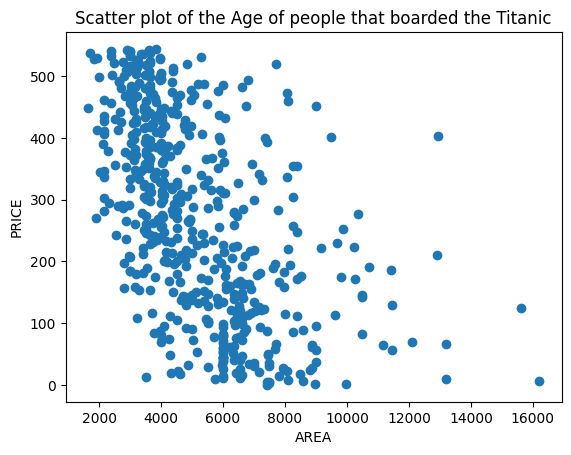

In [ ]:
# Creating a Scatter plot
plt.scatter(df['area'], df.index)
plt.title("Scatter plot of the Age of people that boarded the Titanic")
plt.xlabel("AREA")
plt.ylabel("PRICE")
plt.show()

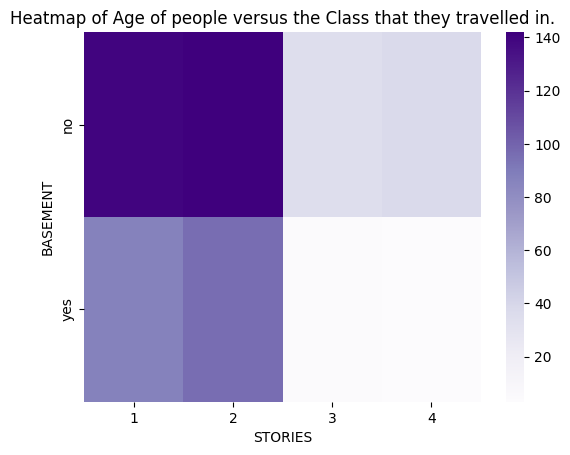

In [ ]:
# Creating a Heatmap
cross_tab = pd.crosstab(df['basement'], df['stories'])
sns.heatmap(cross_tab, annot = False, cmap='Purples')
plt.title('Heatmap of Age of people versus the Class that they travelled in.')
plt.xlabel("STORIES")
plt.ylabel("BASEMENT")
plt.show()


In [ ]:
df = pd.read_csv("Housing.csv")
df = df.replace({'guestroom': {'yes':1, 'no': 0}})
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,0,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,0,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,0,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,0,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,1,yes,no,yes,2,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,0,yes,no,no,2,unfurnished
541,1767150,2400,3,1,1,no,0,no,no,no,0,semi-furnished
542,1750000,3620,2,1,1,yes,0,no,no,no,0,unfurnished
543,1750000,2910,3,1,1,no,0,no,no,no,0,furnished


**MULTIVARIATE ANALYSIS**

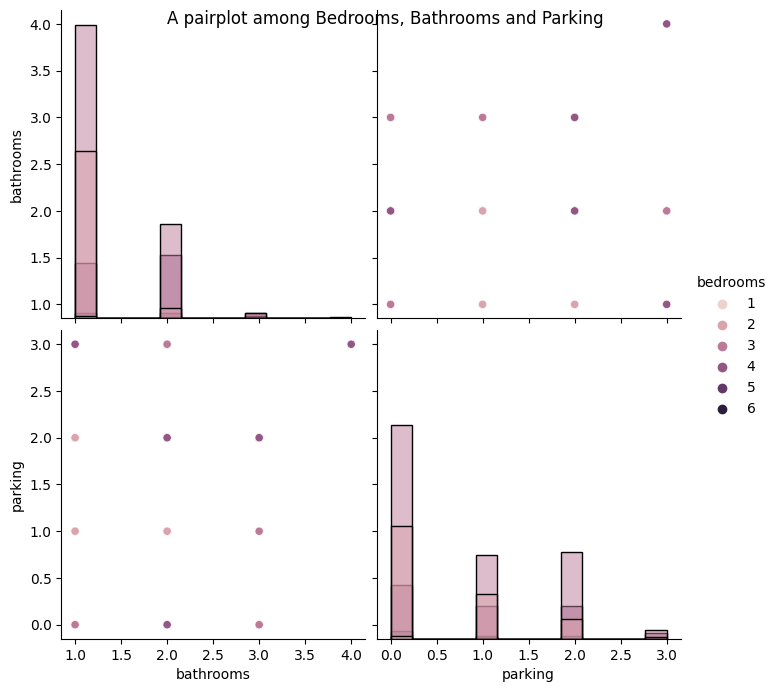

In [ ]:
var = ['bedrooms', 'bathrooms', 'parking']
pp = sns.pairplot(df[var], hue='bedrooms', diag_kind='hist', height=3.5)
pp.fig.suptitle("A pairplot among Bedrooms, Bathrooms and Parking")
plt.show()

# **4. Perform descriptive statistics on the dataset.**

In [ ]:
print("Mean of the area colum", df['area'].mean(), "\n")
print("Median of the price column", df['price'].median(), "\n")
print("Range of the age", df['area'].max() - df['area'].min(), "\n")
print("Range of the price", df['price'].max() - df['price'].min(), "\n")
print("Variance of the price", df['price'].var(), "\n")
print("Standard Deviation of the price", df['price'].std(), "\n")
print("Variance of the area", df['area'].var(), "\n")
print("Standard Deviation of the area", df['area'].std())


Mean of the area colum 5150.54128440367 

Median of the price column 4340000.0 

Range of the age 14550 

Range of the price 11550000 

Variance of the price 3498544355820.573 

Standard Deviation of the price 1870439.6156573922 

Variance of the area 4709512.057575554 

Standard Deviation of the area 2170.141022508803


# **5. Check for missing values and deal with them.**

In [ ]:
df_train = pd.read_csv('Housing.csv')
df_train.head()

df_train.isnull().sum()


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

THERE ARE NO MISSING VALUES.

# **6. Find the outliers and replace them outliers.**

In [ ]:
housing = pd.DataFrame(pd.read_csv("Housing.csv"))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


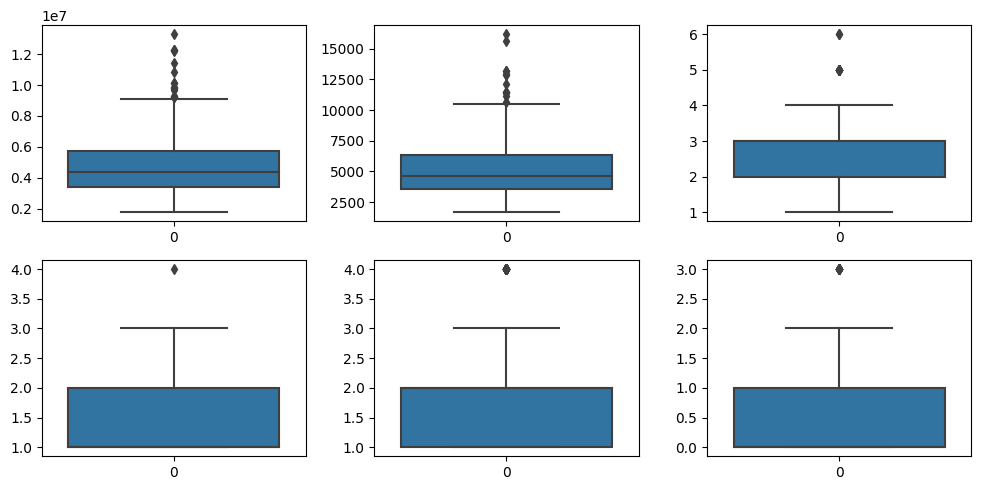

In [ ]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(housing['price'], ax = axs[0,0])
plt2 = sns.boxplot(housing['area'], ax = axs[0,1])
plt3 = sns.boxplot(housing['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(housing['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(housing['stories'], ax = axs[1,1])
plt3 = sns.boxplot(housing['parking'], ax = axs[1,2])

plt.tight_layout()

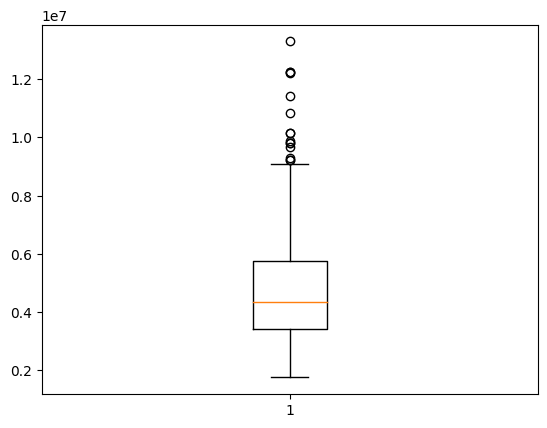

In [ ]:
# Outlier Treatment
# Price and area have considerable outliers.
# We can drop the outliers as we have sufficient data.
# outlier treatment for price
plt.boxplot(housing.price)
Q1 = housing.price.quantile(0.25)
Q3 = housing.price.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.price >= Q1 - 1.5*IQR) & (housing.price <= Q3 + 1.5*IQR)]

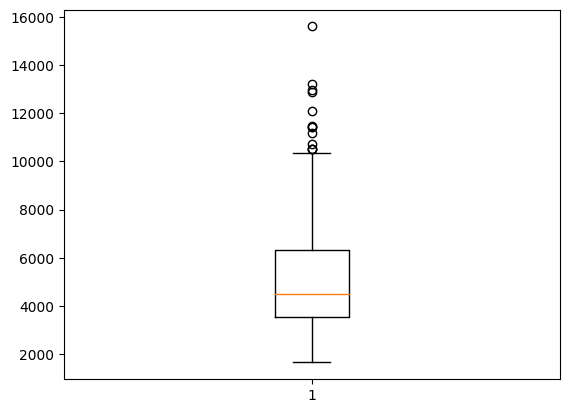

In [ ]:
# outlier treatment for area
plt.boxplot(housing.area)
Q1 = housing.area.quantile(0.25)
Q3 = housing.area.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.area >= Q1 - 1.5*IQR) & (housing.area <= Q3 + 1.5*IQR)]


# **7. Check for Categorical columns and perform encoding.**

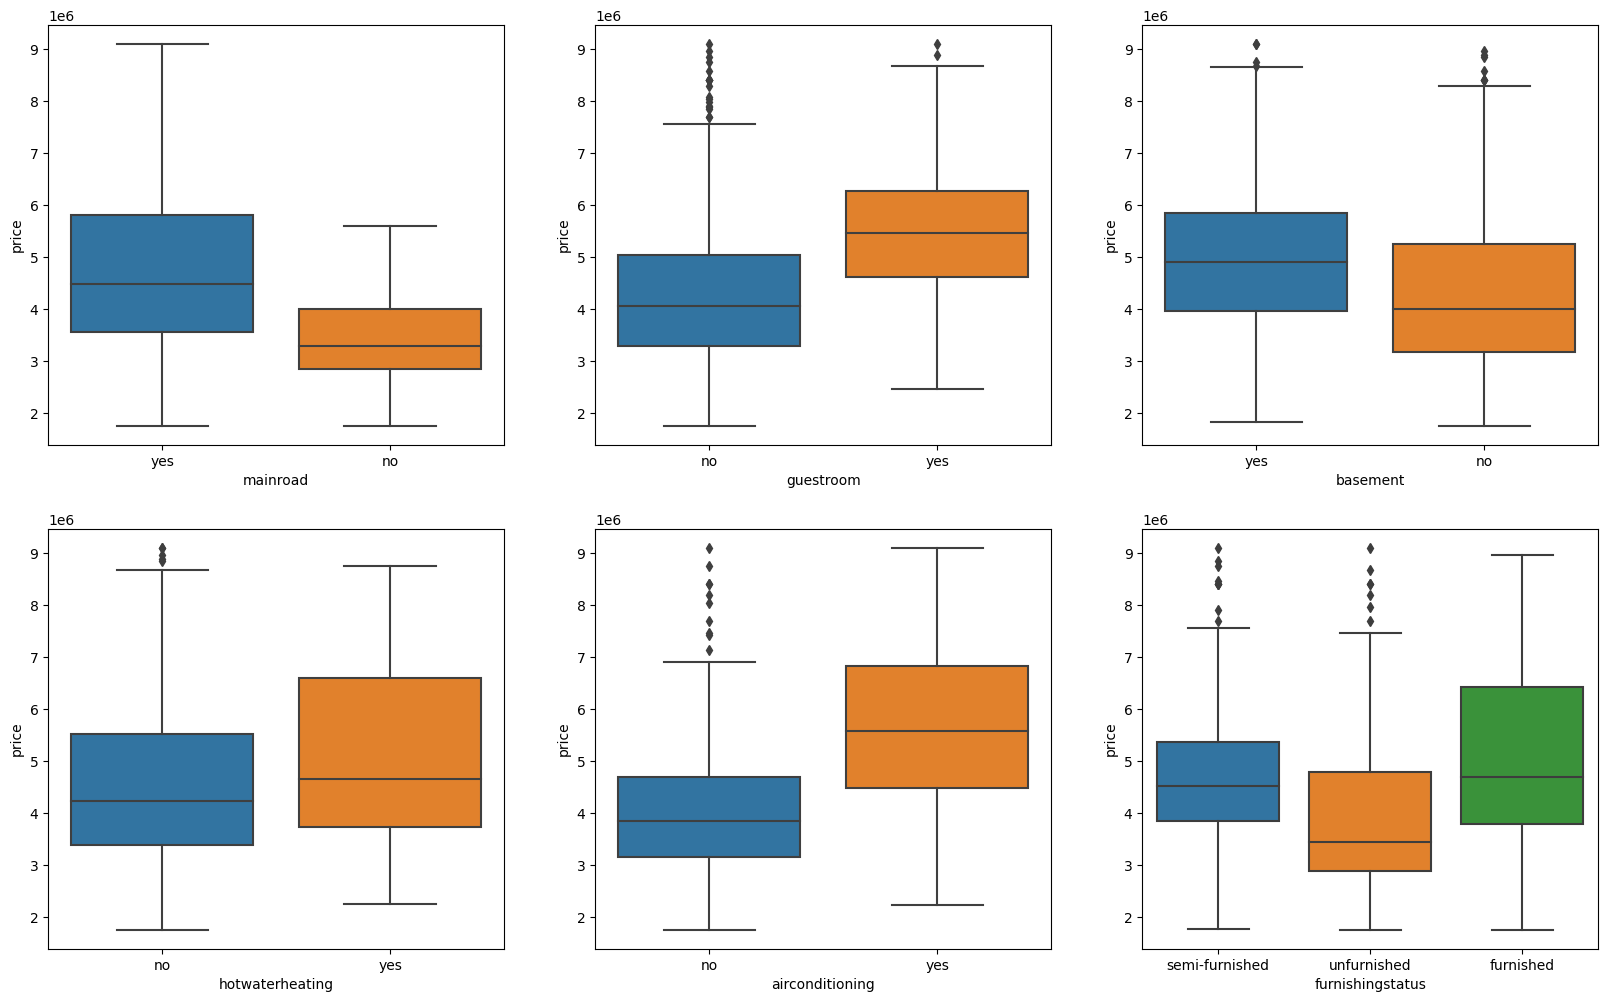

In [ ]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = housing)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = housing)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = housing)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = housing)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = housing)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = housing)
plt.show()

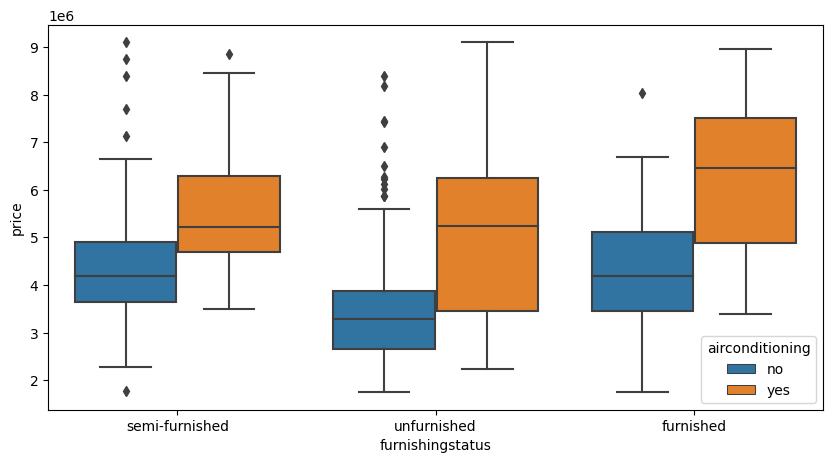

In [ ]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = housing)
plt.show()

# **8. Split the data into dependent and independent variables.**

In [ ]:
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,semi-furnished
16,9100000,6600,4,2,2,1,1,1,0,1,1,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,furnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,furnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,semi-furnished


In [ ]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

# **9. Scale the Independent Variables**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
148,0.523810,0.526907,0.4,0.0,0.666667,1,0,0,0,0,0.000000,semi-furnished
236,0.390476,0.114134,0.2,0.0,0.333333,1,1,1,0,0,0.000000,semi-furnished
356,0.275238,0.072738,0.8,0.5,0.000000,0,0,1,0,1,0.333333,furnished
425,0.219048,0.151390,0.2,0.0,0.000000,1,0,1,0,0,0.666667,furnished
516,0.095238,0.157895,0.2,0.0,0.000000,0,1,0,0,0,0.333333,unfurnished


In [ ]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking
count,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000
mean,0.383701,0.350081,0.390582,0.127424,0.268698,0.875346,0.168975,0.349030,0.038781,0.313019,0.218837
std,0.209712,0.207184,0.149146,0.224465,0.287833,0.330784,0.375250,0.477325,0.193341,0.464366,0.287286
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.237143,0.189829,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.338095,0.295092,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.514286,0.491425,0.400000,0.000000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


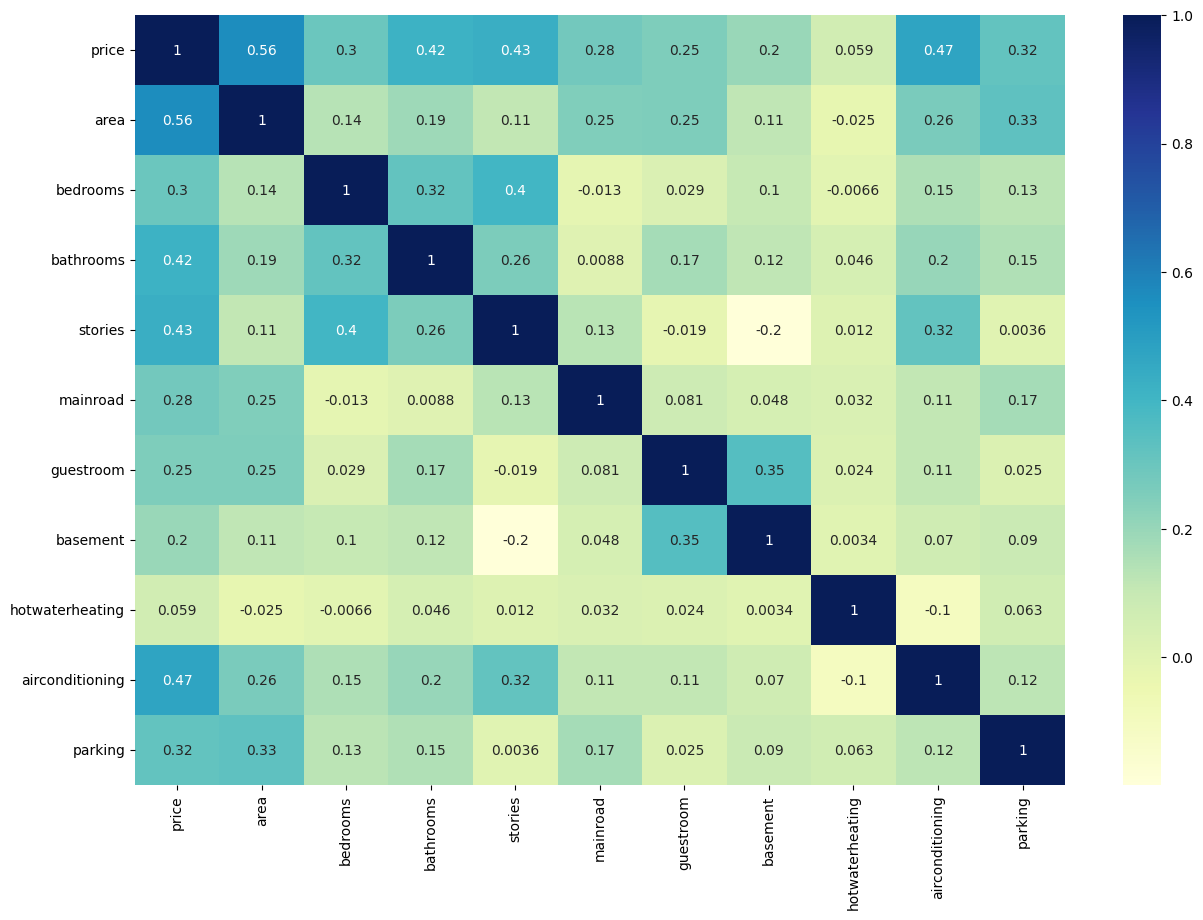

In [ ]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (15, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [ ]:
# Get the dummy variables for the feature 'furnishingstatus' and store it in a new variable - 'status'
status = pd.get_dummies(housing['furnishingstatus'])
# Check what the dataset 'status' looks like
status.head()

,furnished,semi-furnished,unfurnished
15,0,1,0
16,0,0,1
17,1,0,0
18,1,0,0
19,0,1,0


In [ ]:
# Let's drop the first column from status df using 'drop_first = True'

status = pd.get_dummies(housing['furnishingstatus'], drop_first = True)
# Add the results to the original housing dataframe

housing = pd.concat([housing, status], axis = 1)
# Now let's see the head of our dataframe.

housing.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,semi-furnished,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,unfurnished,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,furnished,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,furnished,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,semi-furnished,1,0


In [ ]:
# Drop 'furnishingstatus' as we have created the dummies for it

housing.drop(['furnishingstatus'], axis = 1, inplace = True)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,0


# **10. Splitting the Data into Training and Testing Sets**

In [ ]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

**Dividing into X and Y sets for the model building.**


In [ ]:
y_train = df_train.pop('price')
X_train = df_train

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
rfe = RFE(lm, n_features_to_select=6)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('area', False, 7),
 ('bedrooms', False, 5),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', True, 1),
 ('guestroom', False, 2),
 ('basement', True, 1),
 ('hotwaterheating', False, 4),
 ('airconditioning', True, 1),
 ('parking', False, 3),
 ('semi-furnished', False, 6),
 ('unfurnished', True, 1)]

In [ ]:
col = X_train.columns[rfe.support_]
col

Index(['bathrooms', 'stories', 'mainroad', 'basement', 'airconditioning',
       'unfurnished'],
      dtype='object')

In [ ]:
X_train.columns[~rfe.support_]

Index(['area', 'bedrooms', 'guestroom', 'hotwaterheating', 'parking',
       'semi-furnished'],
      dtype='object')

# **Building model using statsmodel, for the detailed statistics**

In [ ]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
# Adding a constant variable
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

In [ ]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     56.91
Date:                Mon, 05 Jun 2023   Prob (F-statistic):           4.81e-49
Time:                        05:56:40   Log-Likelihood:                -5533.4
No. Observations:                 361   AIC:                         1.108e+04
Df Residuals:                     354   BIC:                         1.111e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.511e+06   2.57e+05     

In [ ]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,19.32
2,stories,1.27
5,airconditioning,1.16
1,bathrooms,1.13
4,basement,1.11
6,unfurnished,1.05
3,mainroad,1.04


# **Residual Analysis of the train data**

Text(0.5, 0, 'Errors')

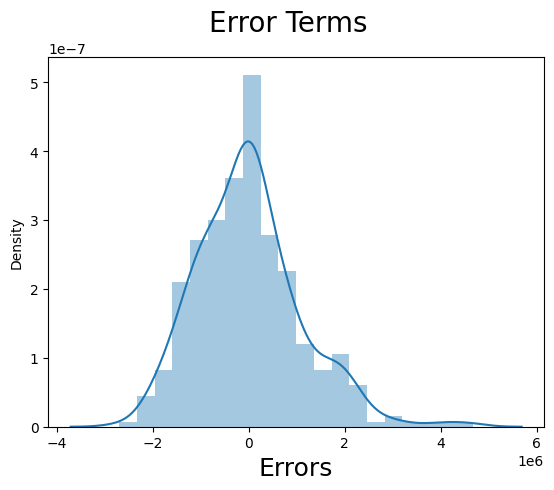

In [ ]:
y_train_price = lm.predict(X_train_rfe)
res = (y_train_price - y_train)
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)                         # X-label

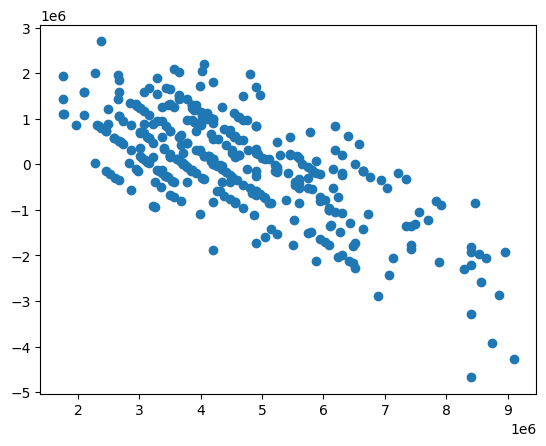

In [ ]:
plt.scatter(y_train,res)
plt.show()

# **Model Evaluation**

In [ ]:
#Applying the scaling on the test sets
num_vars = ['area','stories', 'bathrooms', 'airconditioning','parking','price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [ ]:
#Dividing into X_test and y_test
y_test = df_test.pop('price')
X_test = df_test

In [ ]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test
X_test_rfe = X_test[X_train_rfe.columns]
# Making predictions
y_pred = lm.predict(X_test_rfe)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-143108539109237.97

Text(0, 0.5, 'y_pred')

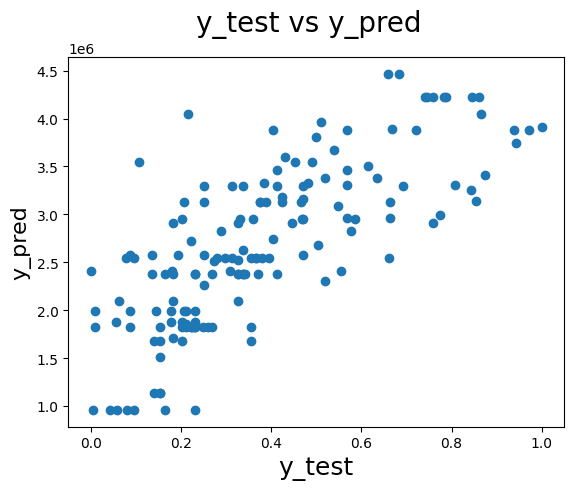

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)